# 2.1 Datasets

In [2]:
library(ggplot2)
head(diamonds)

Warning message:
"package 'ggplot2' was built under R version 4.2.2"


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


The diamonds dataset consists of prices and quality information
about 54,000 diamonds, and is included in the ggplot2 package.

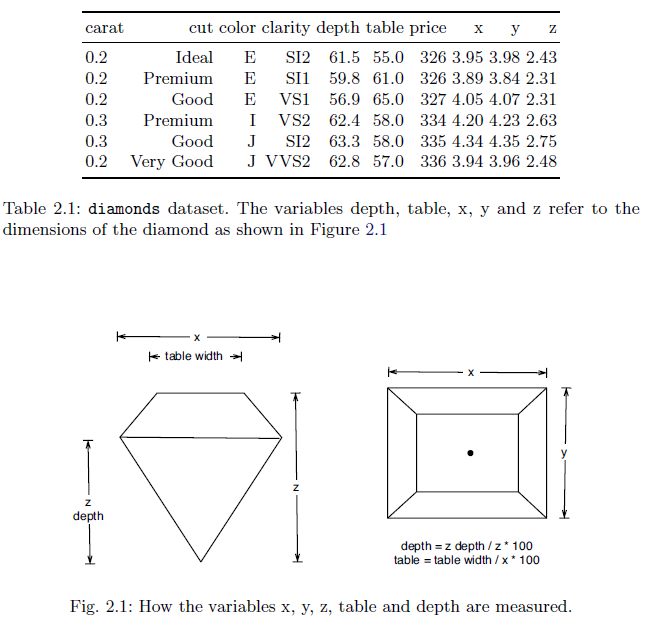

We’ll also use another dataset, dsmall, which is a random sample
of 100 diamonds. We’ll use this data for plots that are more appropriate for
smaller datasets.

In [4]:
set.seed(1410)
dsmall <- diamonds[sample(nrow(diamonds), 100), ]
head(dsmall)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.30,Ideal,G,VVS2,62.0,57,878,4.32,4.29,2.67
0.32,Good,D,SI1,63.5,55,589,4.31,4.35,2.75
0.25,Ideal,E,VVS1,62.3,53,783,4.08,4.11,2.55
0.34,Ideal,D,VS2,60.8,57,805,4.50,4.52,2.74
0.90,Very Good,E,SI2,63.2,61,3239,6.06,5.99,3.81
1.25,Ideal,F,VS2,62.8,57,8764,6.87,6.85,4.31


# 2.2 Basic use

Here is a simple example of the use of qplot(). It produces a scatterplot
showing the relationship between the price and carats (weight) of a diamond.

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


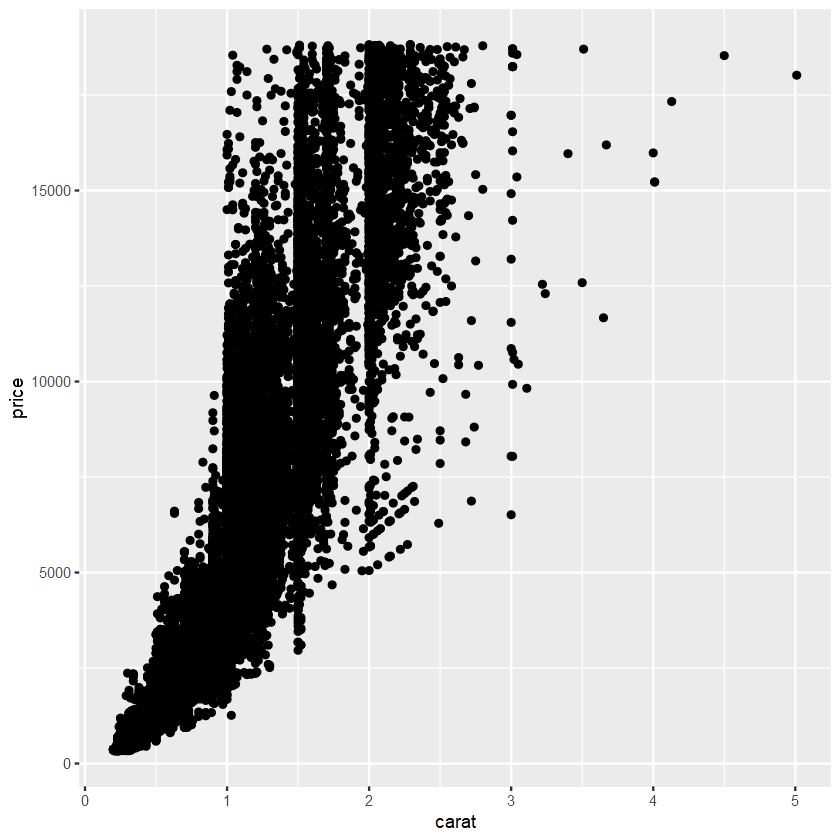

In [5]:
qplot(carat, price, data = diamonds)

Plot log(price) vs. log(carat)

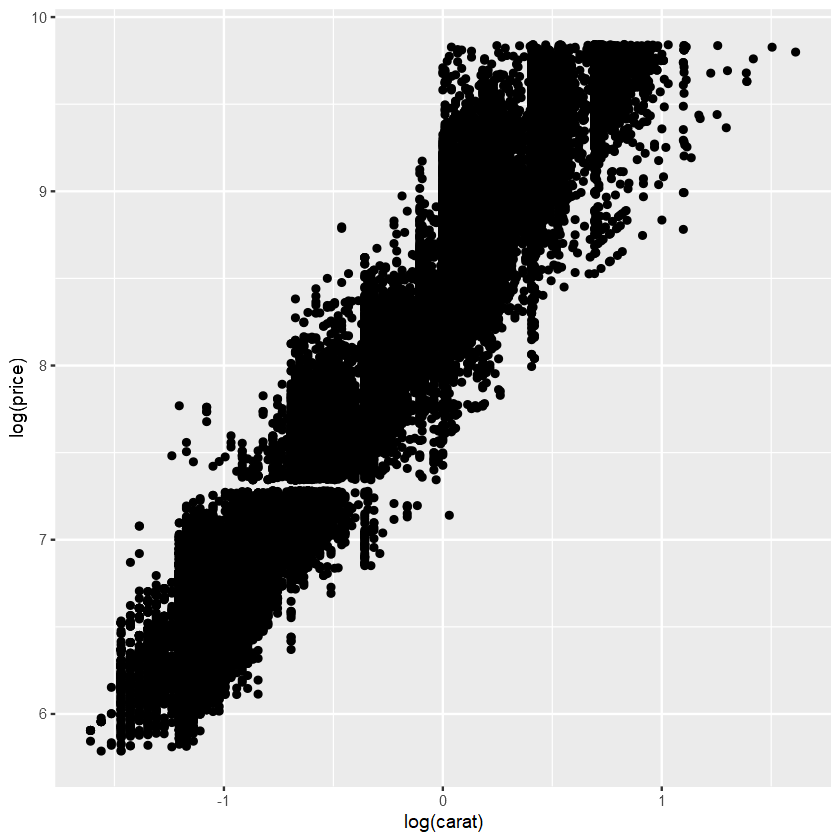

In [6]:
qplot(log(carat), log(price), data = diamonds)

if we are curious about the relationship between the volume of the diamond (approximated
by x × y × z) and its weight, we could do the following

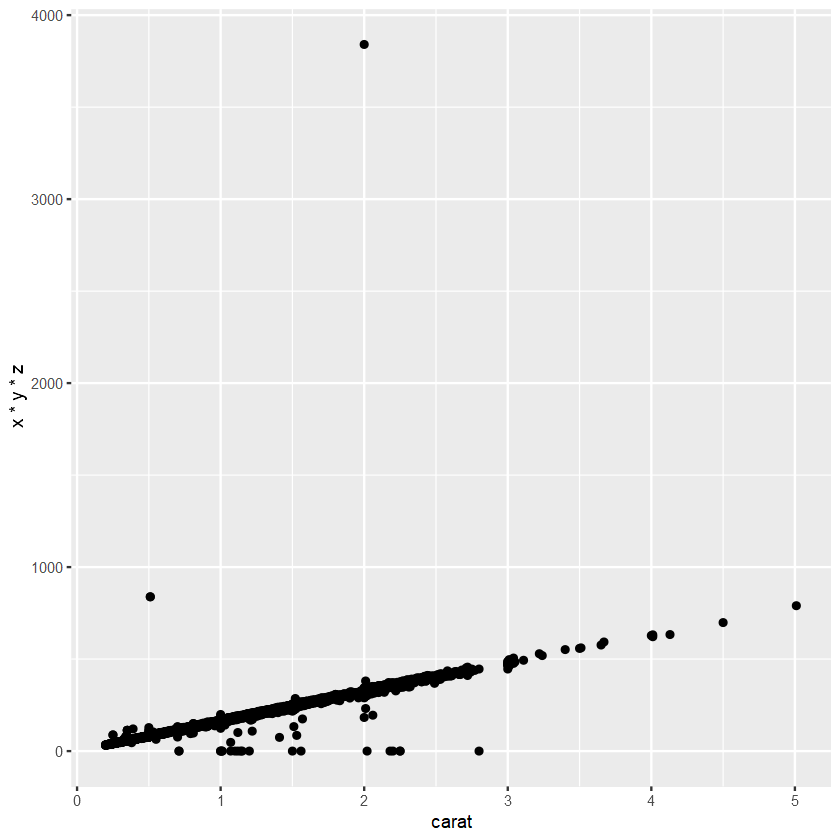

In [7]:
qplot(carat, x * y * z, data = diamonds)

## 2.3 Colour, size, shape and other aesthetic attributes

Colour and shape of the point

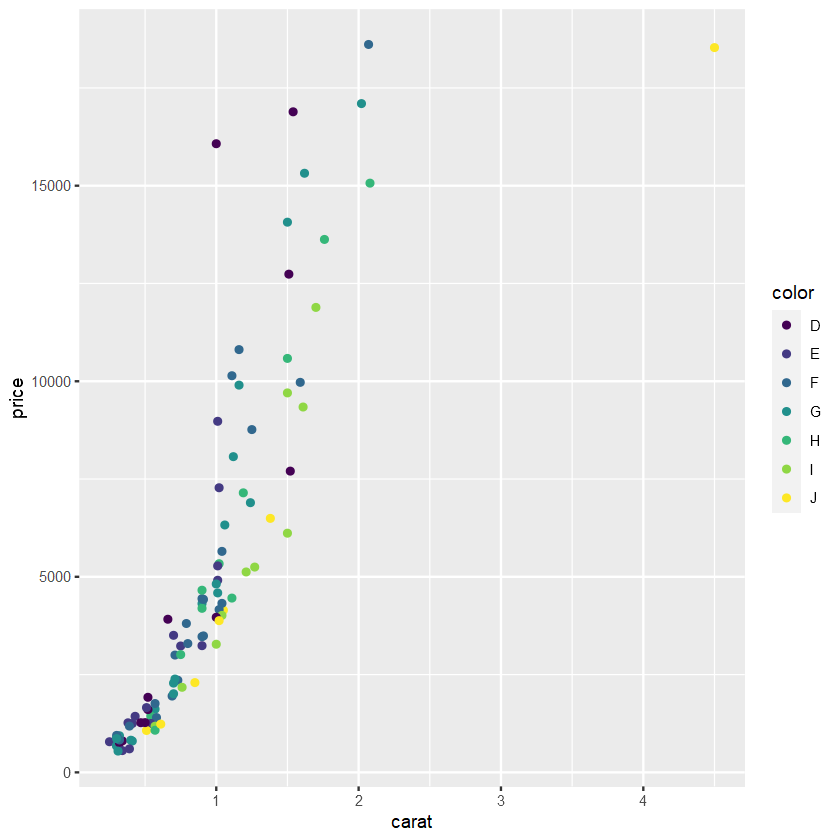

In [9]:
qplot(carat, price, data = dsmall, colour = color)

Warning message:
"Using shapes for an ordinal variable is not advised"


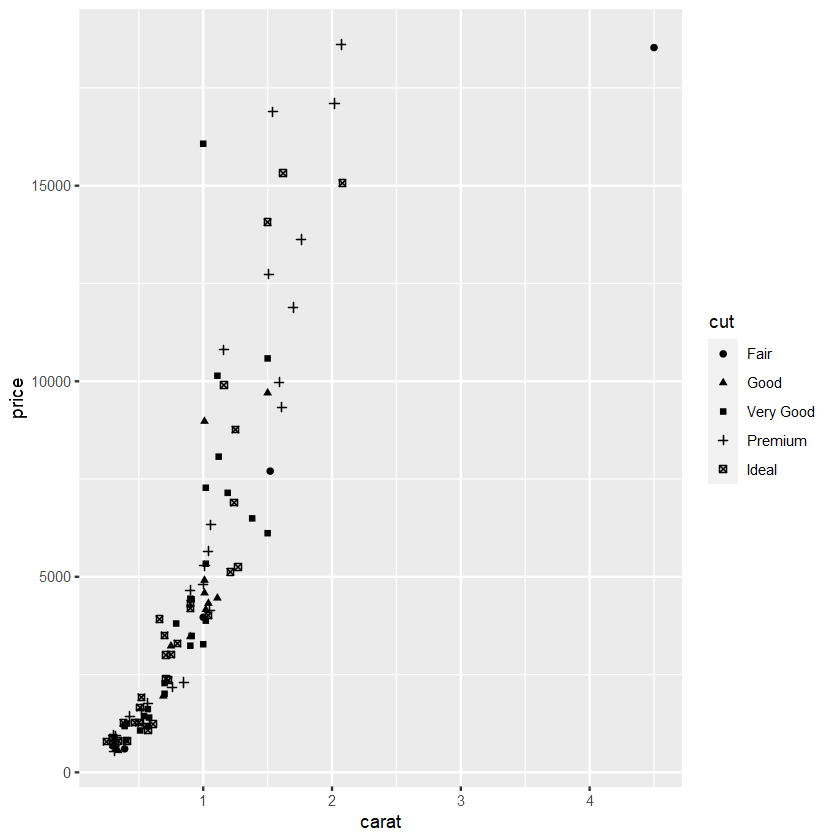

In [11]:
qplot(carat, price, data = dsmall, shape = cut)

In [12]:
I(0.01)

[1] 0.01

Diaphaneity of points (useful for large datasets)

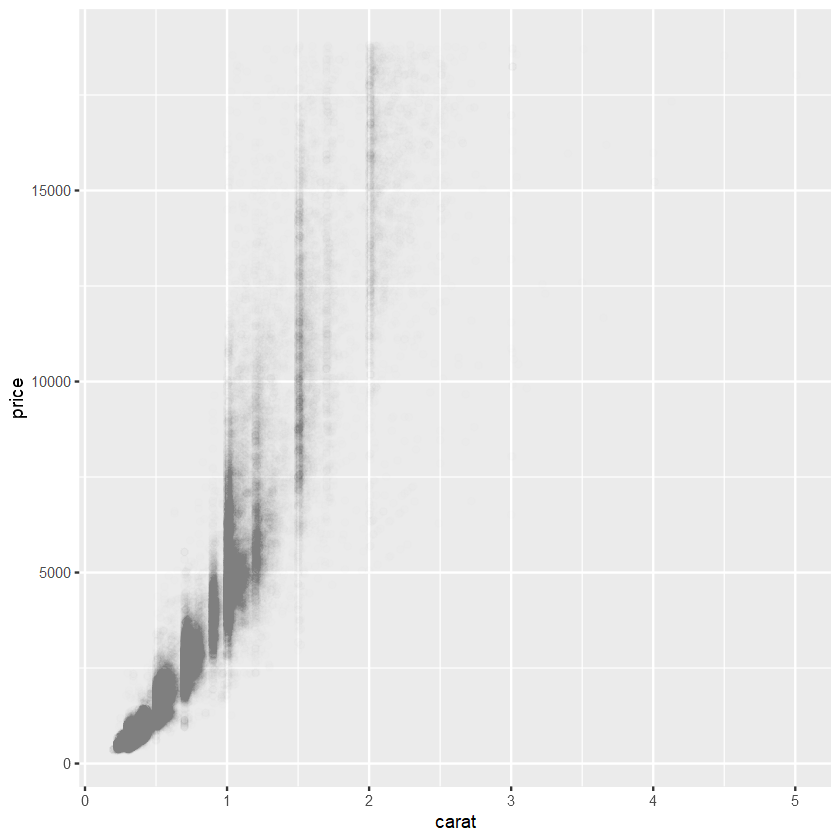

In [15]:
qplot(carat, price, data = diamonds, alpha = I(1/200))

## 2.4 Plot geoms

Adding a smoother to a plot

Loess does not work well for large datasets (it’s O(n2) in memory), and so
an alternative smoothing algorithm is used when n is greater than 1,000.
You could also load the mgcv library and use method = "gam", formula
= y ∼ s(x) to fit a generalised additive model. This is similar to using a
spline with lm, but the degree of smoothness is estimated from the data.
For large data, use the formula y ~ s(x, bs = "cs"). This is used by
default when there are more than 1,000 points.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


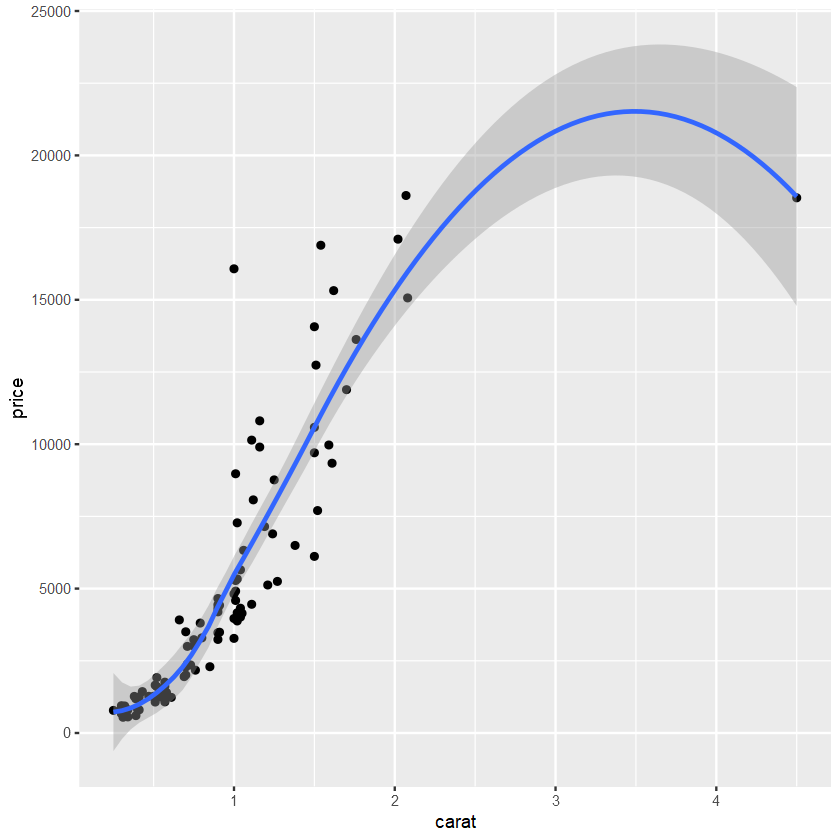

In [31]:
library(mgcv)
qplot(carat, price, data = dsmall, geom = c("point", "smooth"))

Warning message in geom_point(method = "gam", formula = y ~ s(x, bs = "cs")):
"Ignoring unknown parameters: `method` and `formula`"


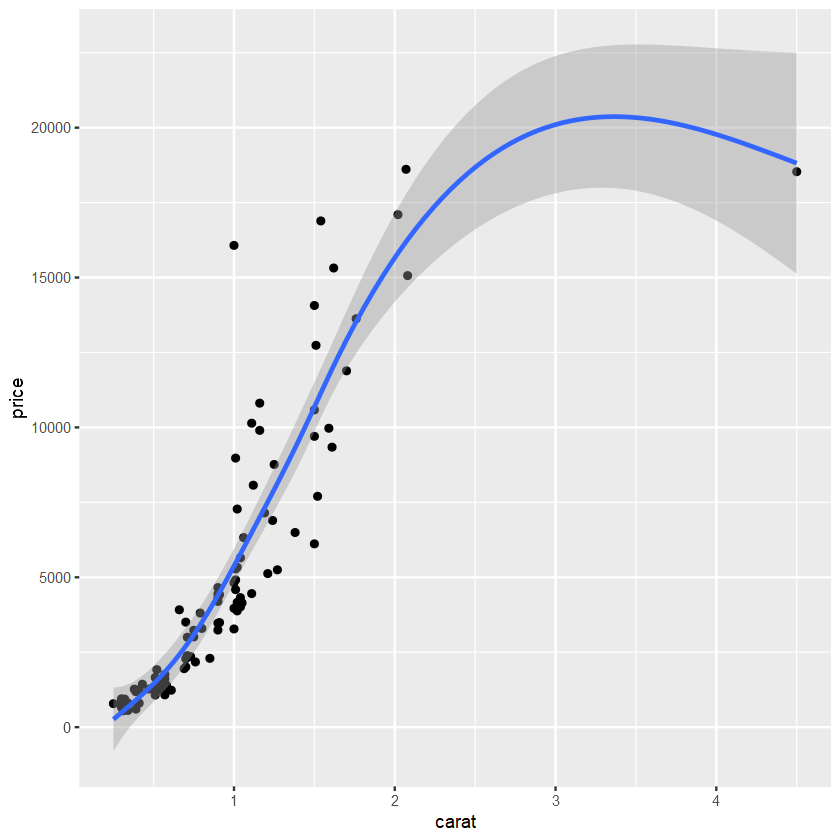

In [28]:
qplot(carat, price, data = dsmall, geom = c("point", "smooth"),
method = "gam", formula = y ~ s(x, bs = "cs"))

method = "lm" fits a linear model. The default will fit a straight line to
your data, or you can specify formula = y ~ poly(x, 2) to specify a
degree 2 polynomial, or better, load the splines package and use a natural
spline: formula = y ~ ns(x, 2).

Warning message in geom_point(method = "lm"):
"Ignoring unknown parameters: `method`"
`geom_smooth()` using formula = 'y ~ x'


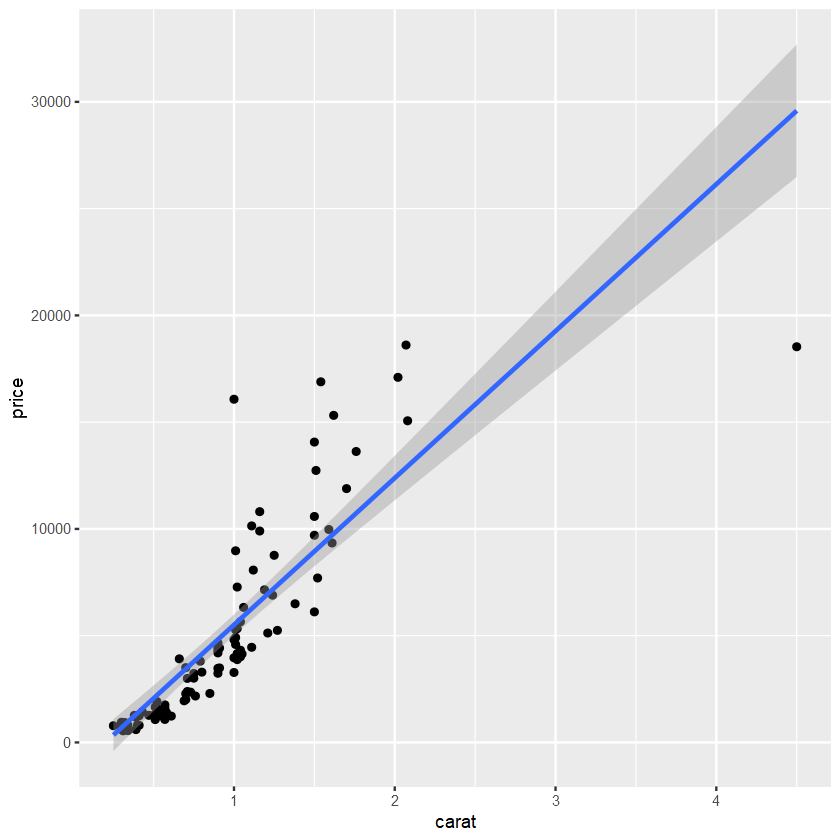

In [32]:
library(splines)
qplot(carat, price, data = dsmall, geom = c("point", "smooth"),
method = "lm")

Warning message in geom_point(method = "lm", formula = y ~ ns(x, 5)):
"Ignoring unknown parameters: `method` and `formula`"


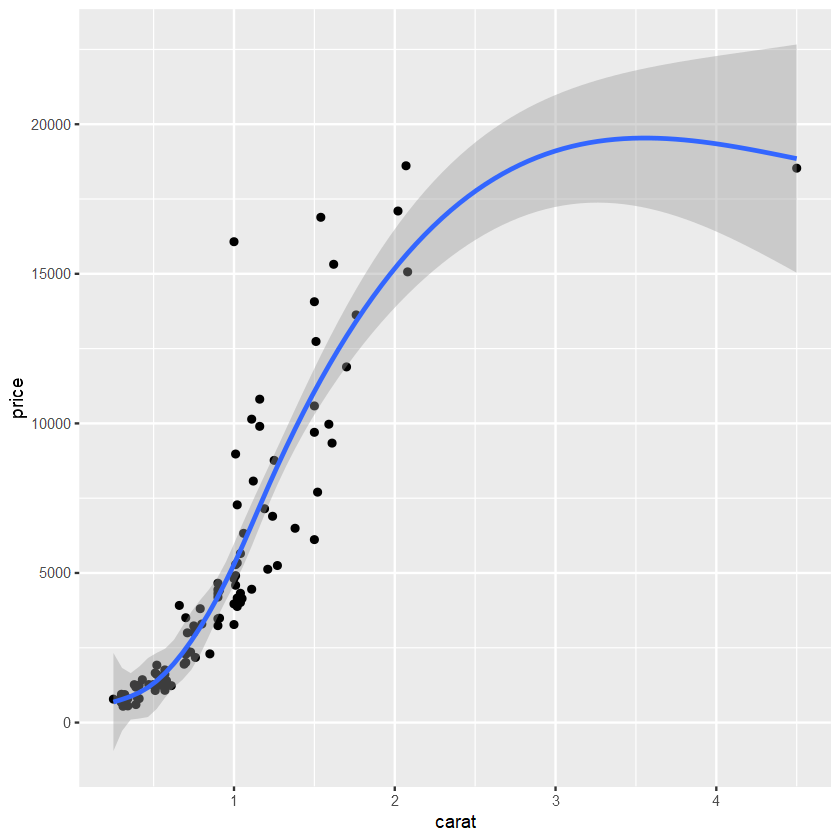

In [33]:
qplot(carat, price, data = dsmall, geom = c("point", "smooth"),
method = "lm", formula = y ~ ns(x,5))

Smoothed line by groups

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


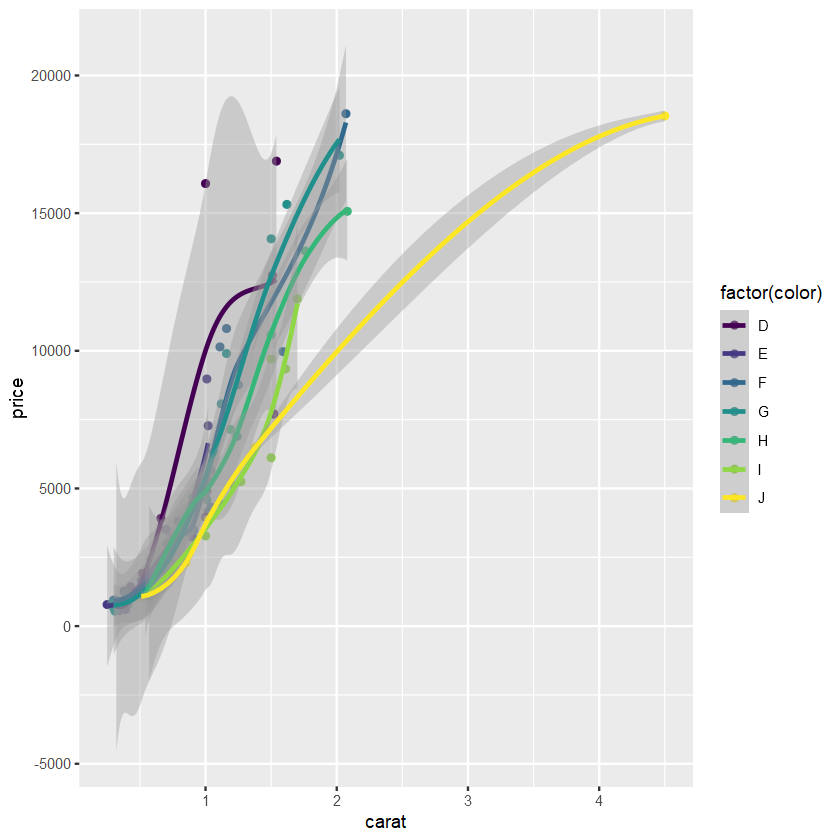

In [36]:
qplot(carat, price, data = dsmall, color = factor(color),
      geom=c("point", "smooth"))

Boxplots and jittered points

The diamond
using jittering (geom = "jitter") and box-and-whisker plots (geom =
"boxplot")

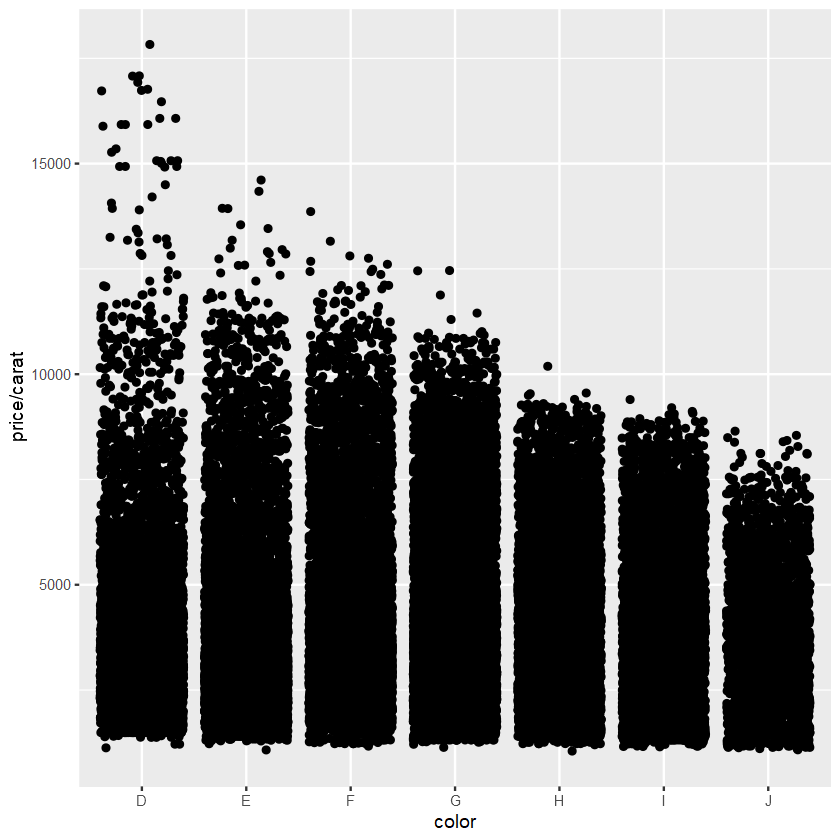

In [39]:
qplot(color, price/carat, data = diamonds, 
      geom="jitter")

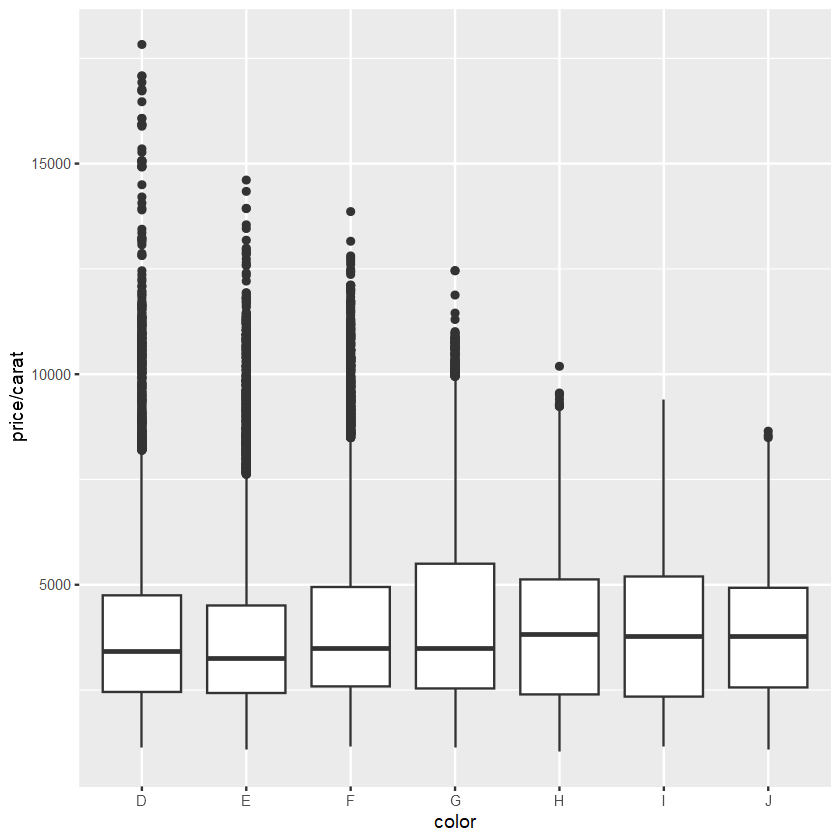

In [40]:
qplot(color, price/carat, data = diamonds, 
      geom="boxplot")

Use the alpha argument to make it easier to see
where the bulk of the points lie

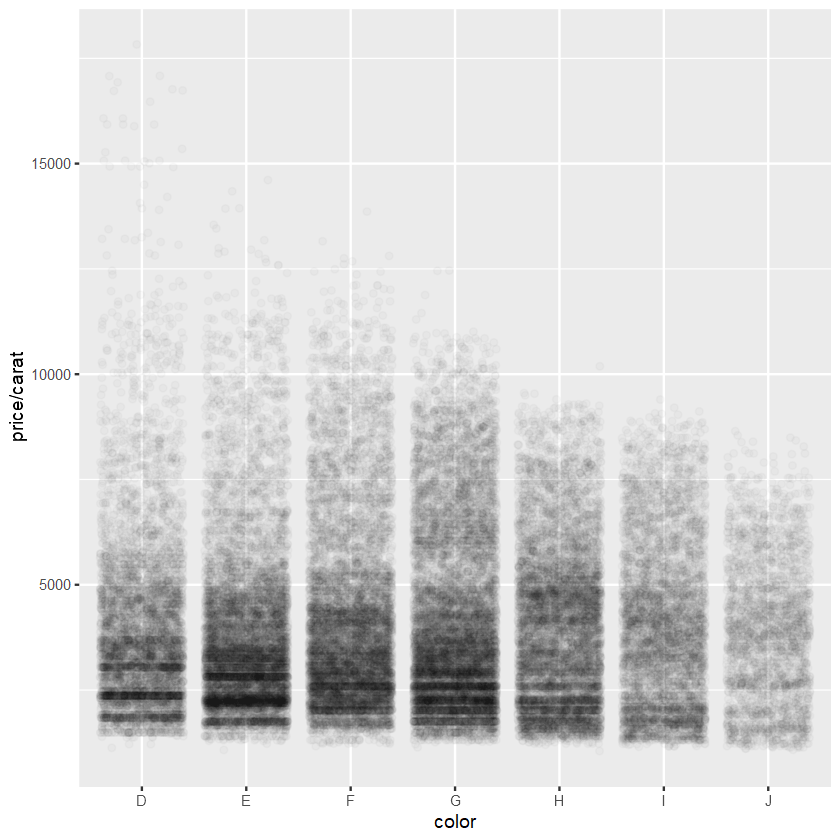

In [41]:
qplot(color, price / carat, data = diamonds, geom = "jitter",
alpha = I(1 / 50))

Histogram and density plots

The distribution of carats with a histogram
and a density plot.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


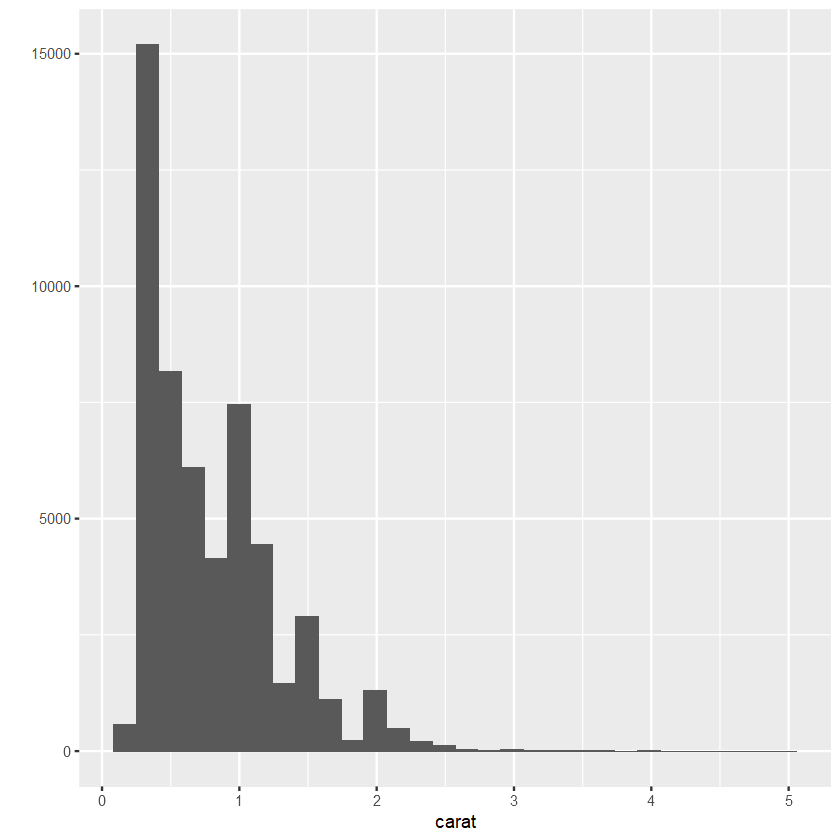

In [42]:
qplot(carat, data = diamonds, geom = "histogram")

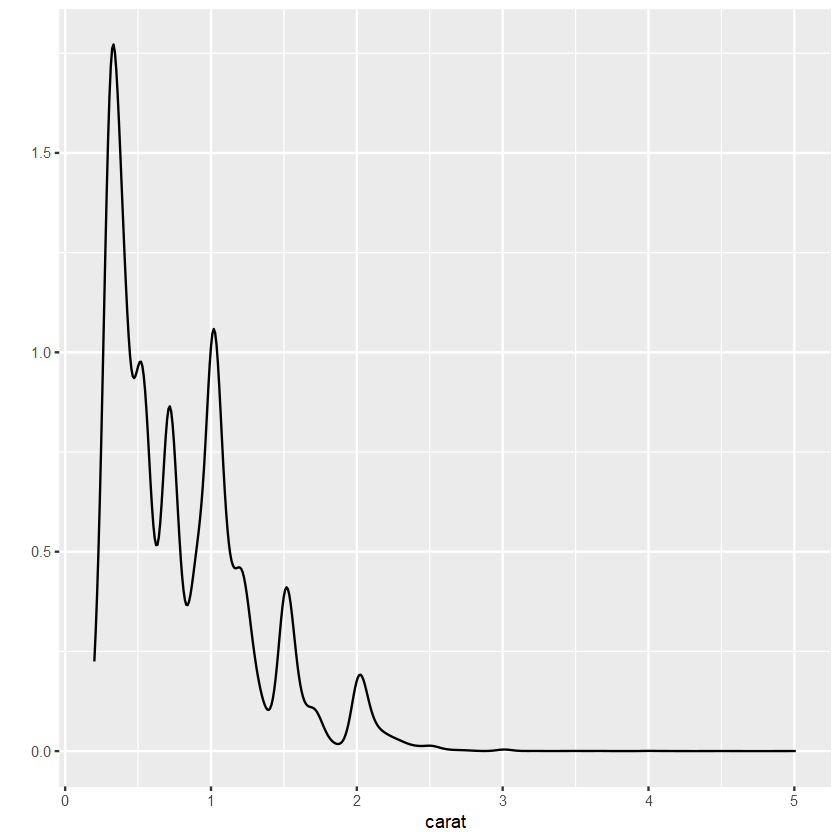

In [43]:
qplot(carat, data = diamonds, geom = "density")

Warning message:
"Removed 32 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


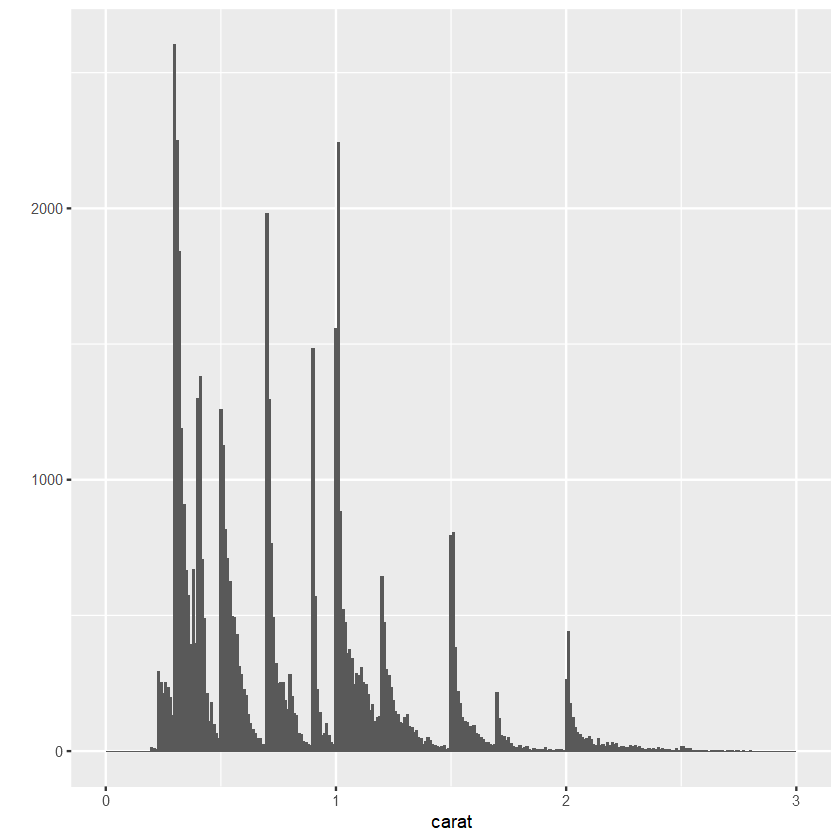

In [44]:
qplot(carat, data = diamonds, geom = "histogram", binwidth = 0.01,
xlim = c(0,3))

To compare the distributions of different subgroups, just add an aesthetic
mapping, as in the following code

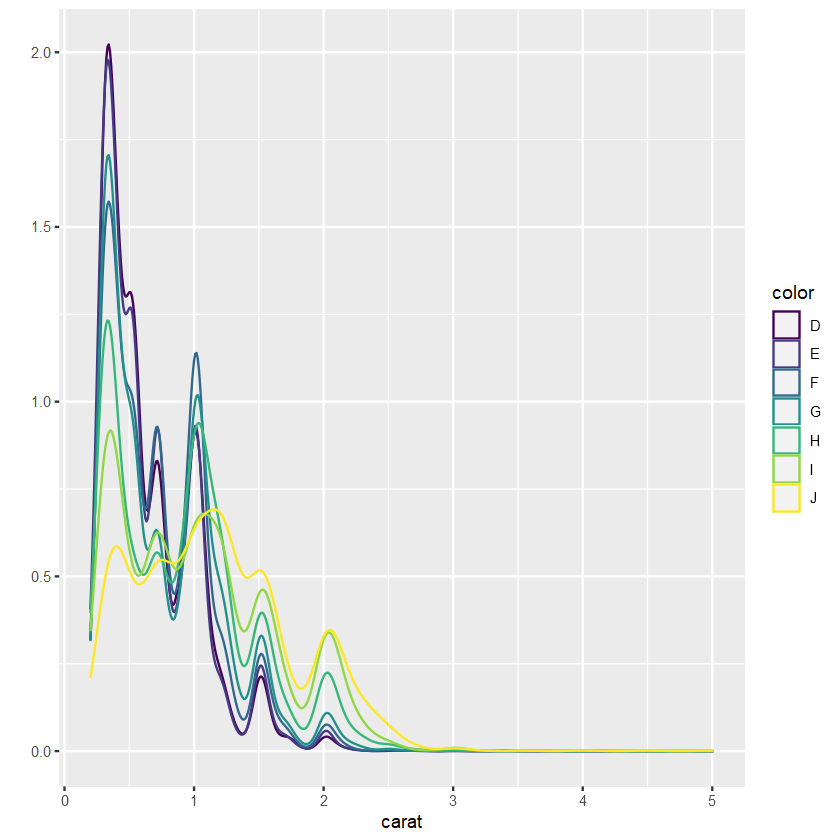

In [45]:
qplot(carat, data = diamonds, geom = "density", colour = color)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


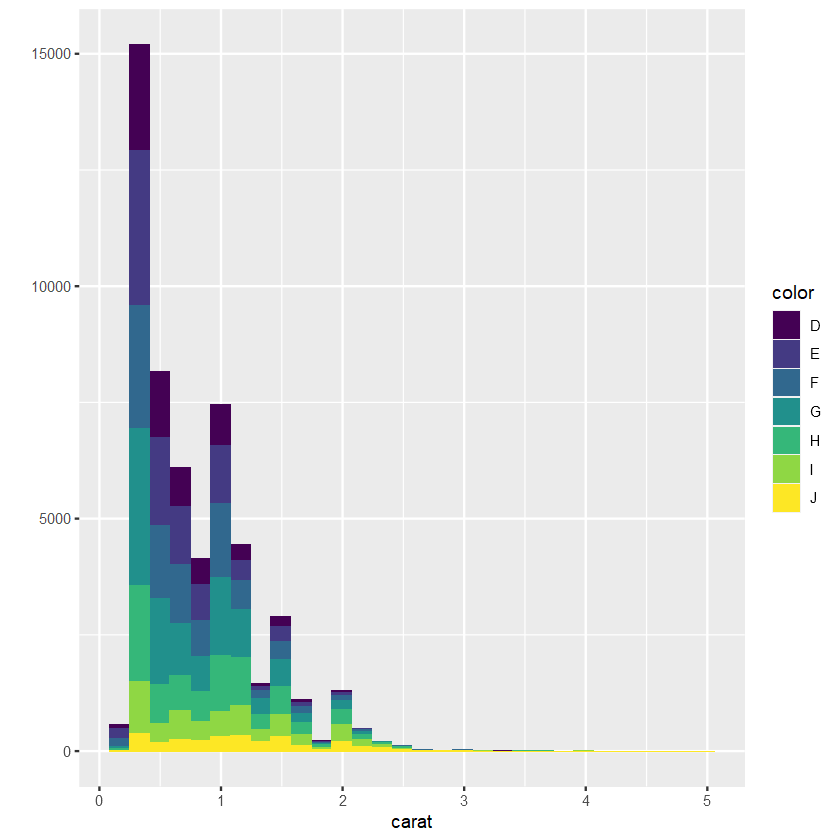

In [46]:
qplot(carat, data = diamonds, geom = "histogram", fill = color)

Bar charts

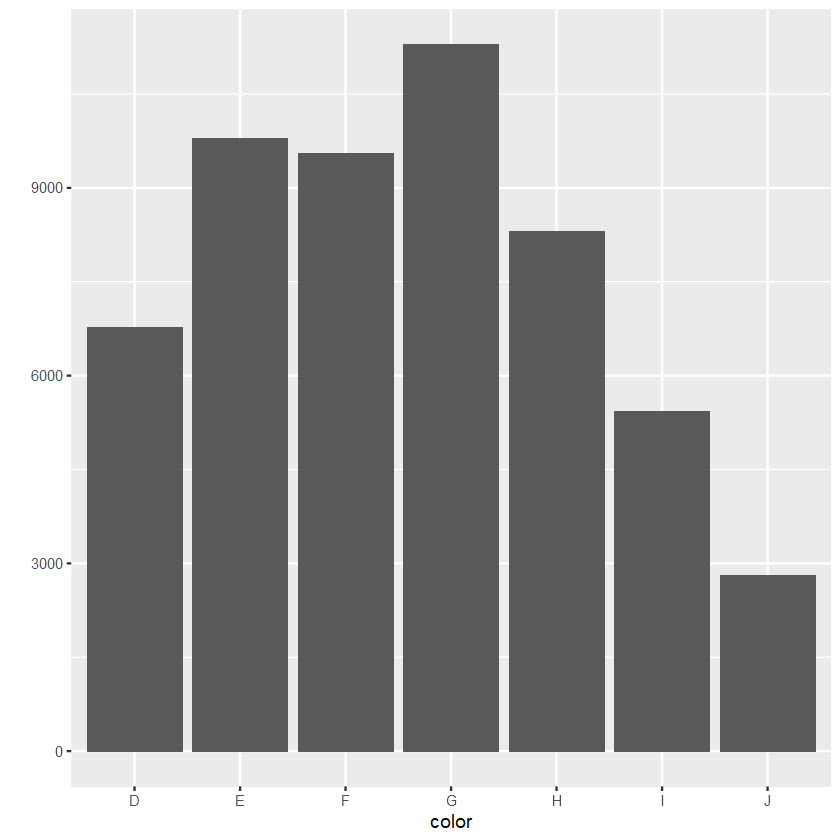

In [47]:
qplot(color, data = diamonds, geom = "bar")

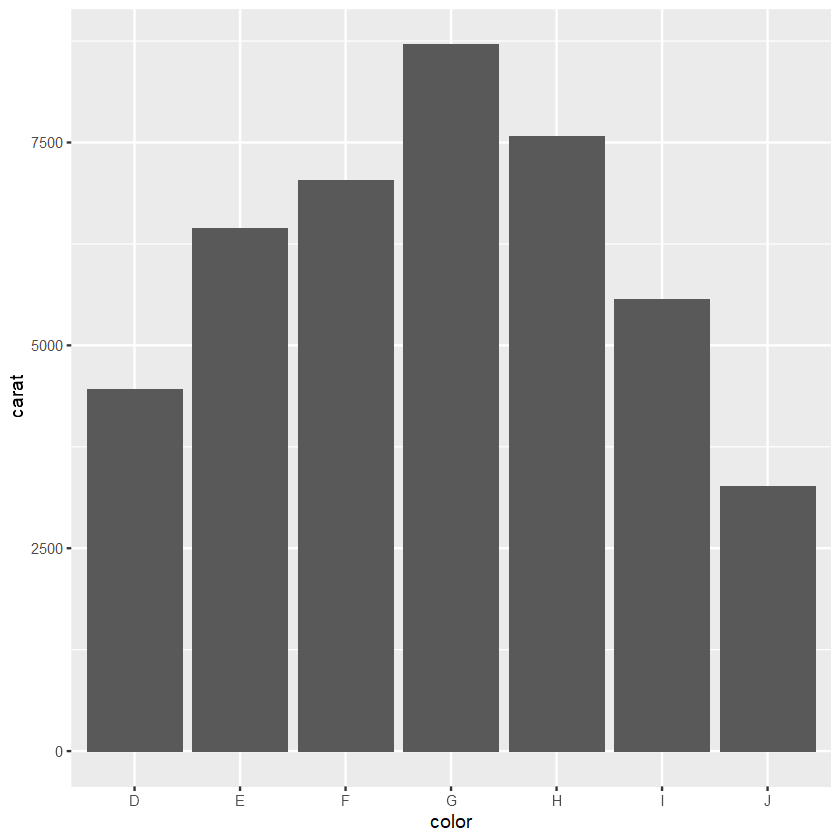

In [48]:
qplot(color, data = diamonds, geom = "bar", weight = carat) +
scale_y_continuous("carat")

Time series with line and path plots

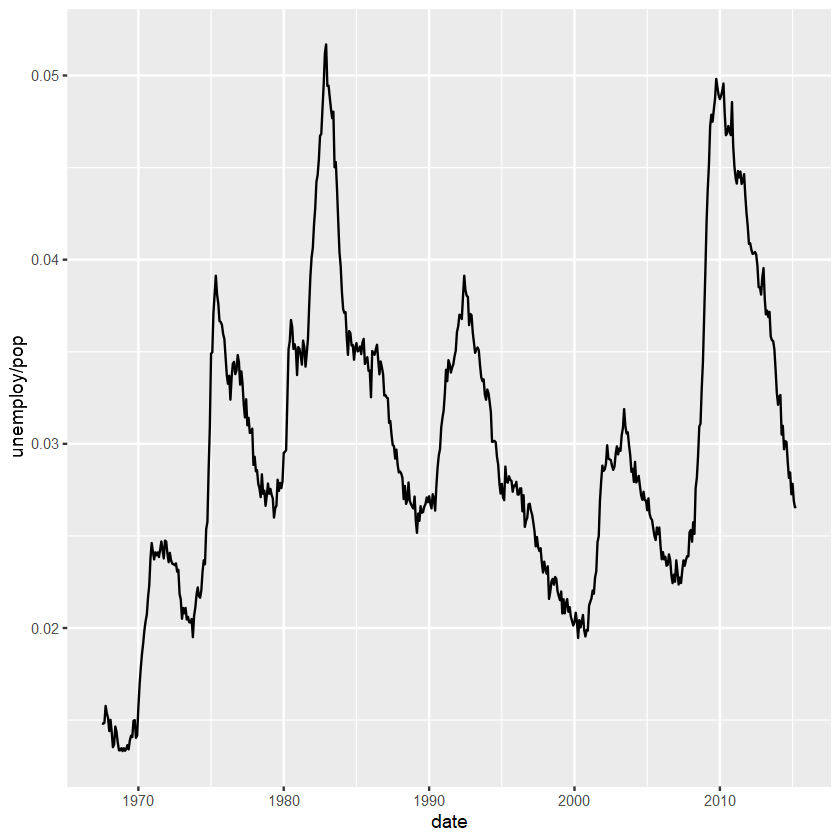

In [49]:
qplot(date, unemploy / pop, data = economics, geom = "line")

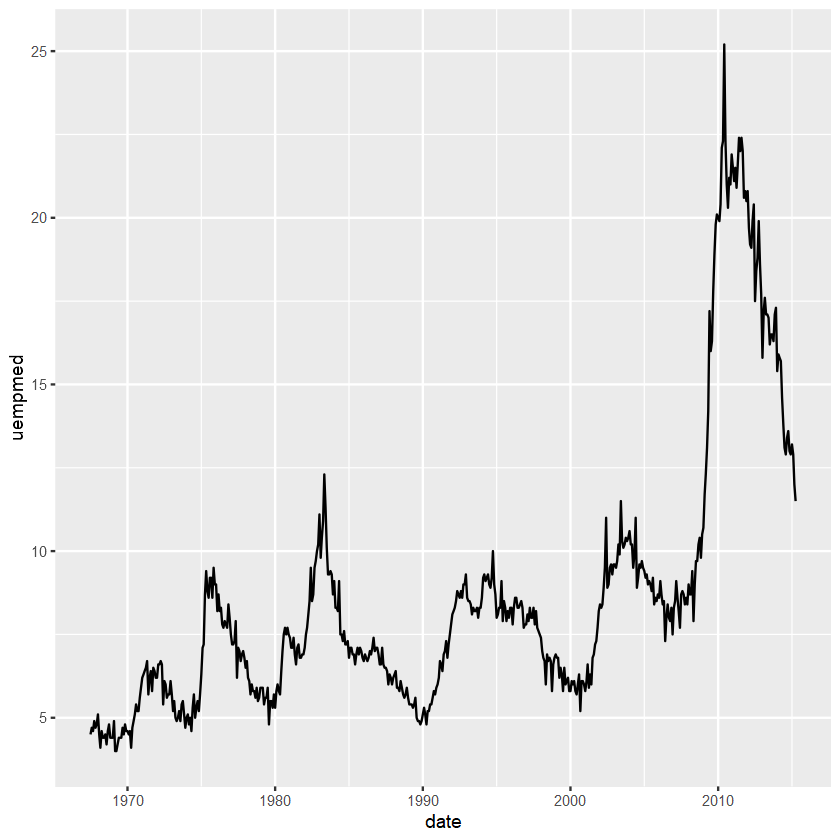

In [50]:
qplot(date, uempmed, data = economics, geom = "line")

To examine this relationship in greater detail, we would like to draw both
time series on the same plot. We could draw a scatterplot of unemployment
rate vs. length of unemployment, but then we could no longer see the evolution over time. The solution is to join points adjacent in time with line segments,
forming a path plot.

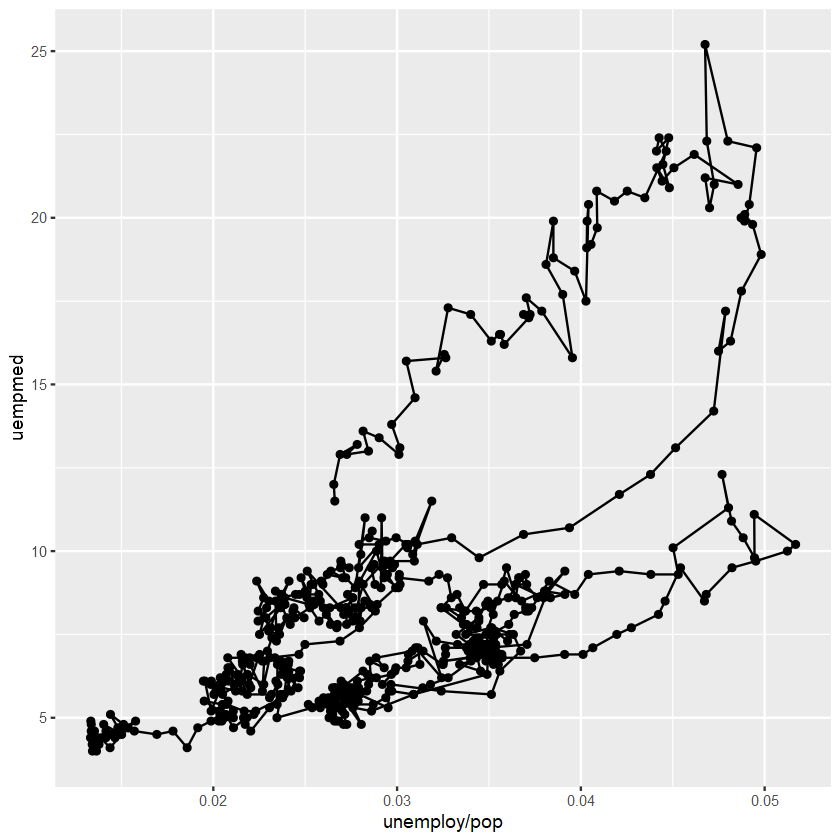

In [52]:
year <- function(x) as.POSIXlt(x)$year + 1900
qplot(unemploy / pop, uempmed, data = economics,
geom = c("point", "path"))

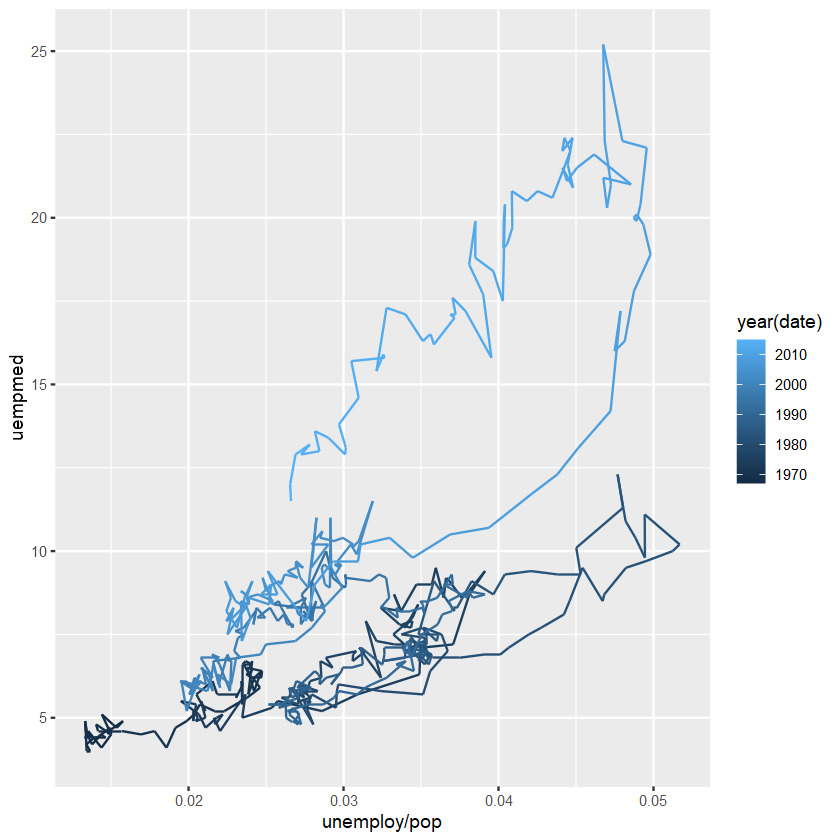

In [57]:
qplot(unemploy / pop, uempmed, data = economics,
geom = "path", colour = year(date))

## 2.5 Faceting

Warning message:
"Removed 32 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 14 rows containing missing values (`geom_bar()`)."


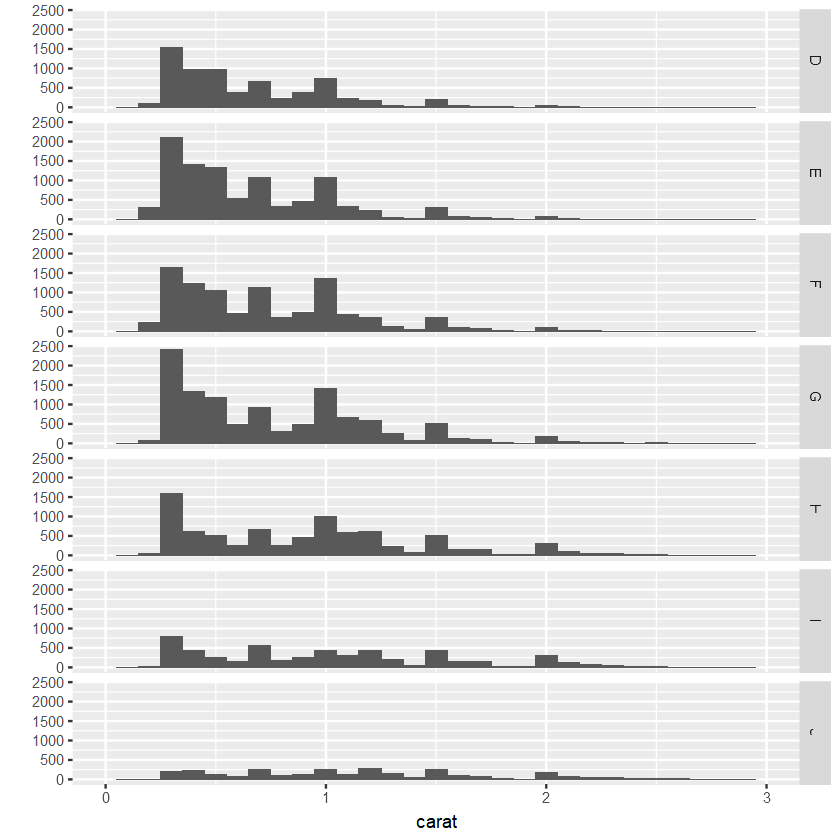

In [58]:
qplot(carat, data = diamonds, facets = color ~ .,
geom = "histogram", binwidth = 0.1, xlim = c(0, 3))

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
Warning message:
"Removed 32 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 14 rows containing missing values (`geom_bar()`)."


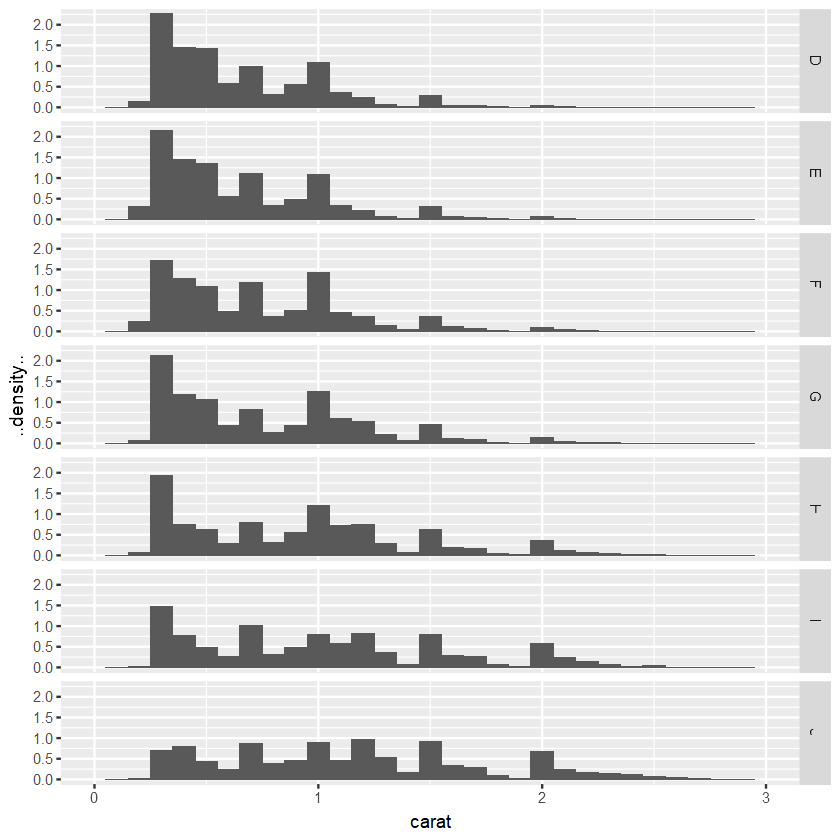

In [59]:
qplot(carat, ..density.., data = diamonds, facets = color ~ .,
geom = "histogram", binwidth = 0.1, xlim = c(0, 3))

## 2.6 Other options

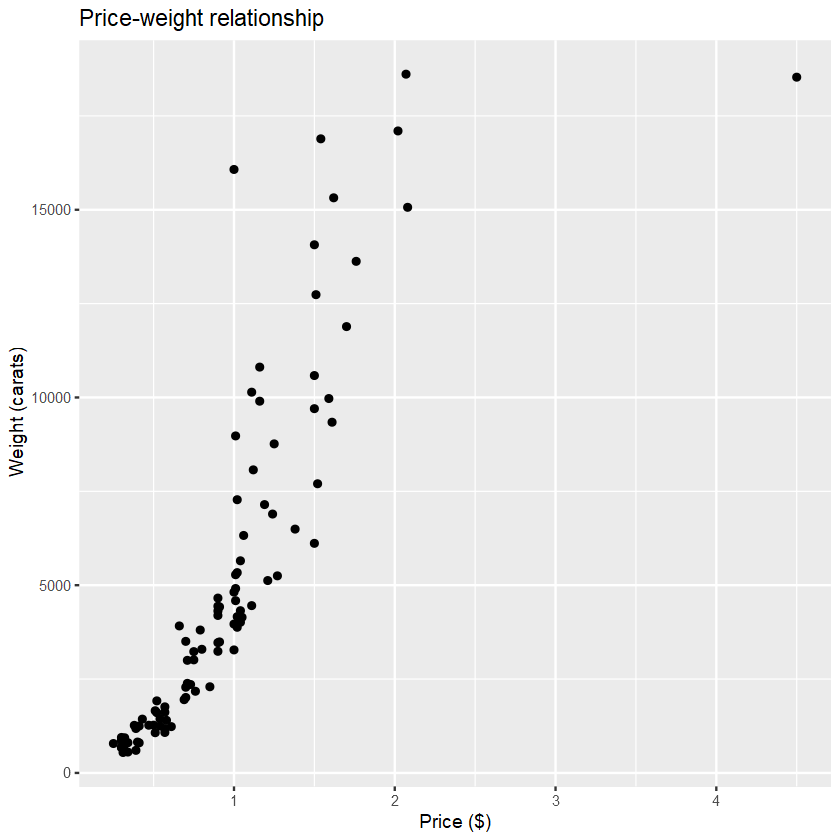

In [61]:
qplot(
 carat, price, data = dsmall,
 xlab = "Price ($)", ylab = "Weight (carats)",
 main = "Price-weight relationship"
 )

Warning message:
"Removed 40 rows containing missing values (`geom_point()`)."


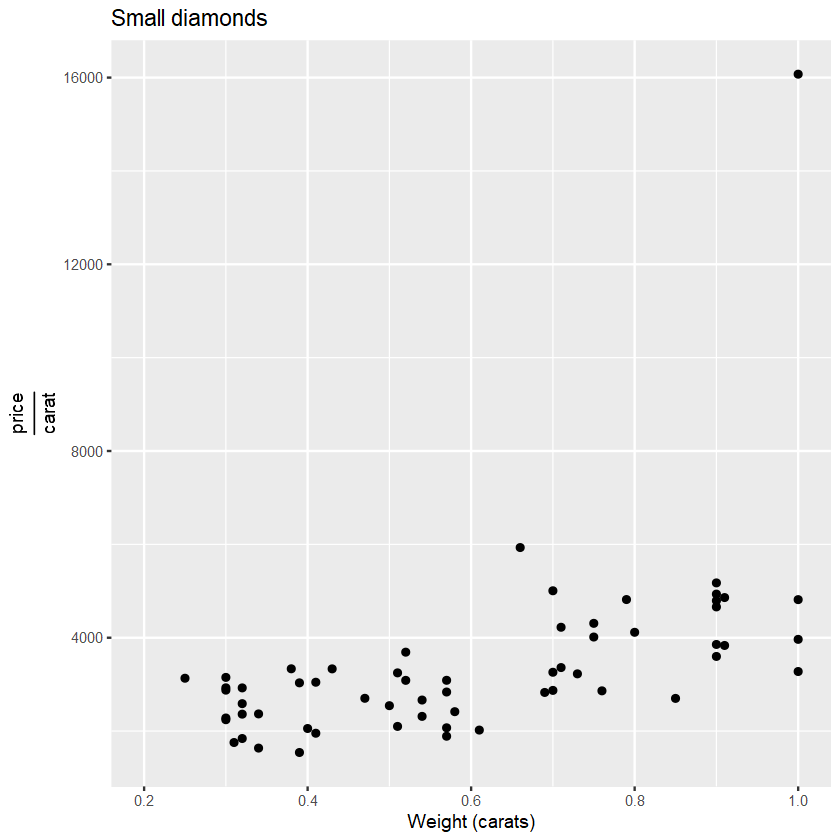

In [62]:
qplot(
 carat, price/carat, data = dsmall,
 ylab = expression(frac(price,carat)),
 xlab = "Weight (carats)",
 main="Small diamonds",
 xlim = c(.2,1)
 )